## Kaggle Challenge
### Estimación de precios de viviendas

<center> <img src='real_state_pricing.jpg' width='600' /> </center>

### Importación de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de los archivos de datos

In [2]:
train_csv = './data/train.csv'
test_csv = './data/test.csv'

In [3]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

### Combinación de los dataframes

In [4]:
df = pd.concat( [train_df, test_df], keys=['train', 'test'], axis=0) 

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [6]:
df.shape

(2919, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Selección de las variables usadas en la estimación

In [8]:
selected_features = ["OverallQual", "GrLivArea","Neighborhood", "YearBuilt", "GarageCars", "TotalBsmtSF",
    "KitchenQual", "FullBath", "MSZoning", "LotArea", "SalePrice"]

In [9]:
df_backup = df.copy()

In [10]:
df = df[selected_features]

### Estudio preliminar del dataframe

#### Comprobación de datos nulos

In [11]:
df.isna().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
SalePrice       1459
dtype: int64

Hago una comprobación de los valores nulos de la variable `SalePrice`

In [12]:
df[df.SalePrice.isna() ]

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
test 0               5        896        NAmes       1961         1.0   
     1               6       1329        NAmes       1958         1.0   
     2               5       1629      Gilbert       1997         2.0   
     3               6       1604      Gilbert       1998         2.0   
     4               8       1280      StoneBr       1992         2.0   
...                ...        ...          ...        ...         ...   
     1454            4       1092      MeadowV       1970         0.0   
     1455            4       1092      MeadowV       1970         1.0   
     1456            5       1224      Mitchel       1960         2.0   
     1457            5        970      Mitchel       1992         0.0   
     1458            7       2000      Mitchel       1993         3.0   

           TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  SalePrice  
test 0           882.0          TA         1       RH    11622        NaN  
     1          1329.0          Gd         1       RL    14267        NaN  
     2           928.0          TA         2       RL    13830        NaN  
     3           926.0          Gd         2       RL     9978        NaN  
     4          1280.0          Gd         2       RL     5005        NaN  
...                ...         ...       ...      ...      ...        ...  
     1454        546.0          TA         1       RM     1936        NaN  
     1455        546.0          TA         1       RM     1894        NaN  
     1456       1224.0          TA         1       RL    20000        NaN  
     1457        912.0          TA         1       RL    10441        NaN  
     1458        996.0          TA         2       RL     9627        NaN  

[1459 rows x 11 columns]

Los valores nulos de `SalePrice` se deben a que pertenecen a la parte del dataset `test`, cuyos valores de la variable precio de venta deberán ser estimados.

#### Estudio estadístico de las variables cuantitativas

In [13]:
df.describe().round(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
count,2919.00,2919.00,2919.00,2918.00,2918.00,2919.00,2919.00,1460.0
mean,6.09,1500.76,1971.31,1.77,1051.78,1.57,10168.11,180921.2
std,1.41,506.05,30.29,0.76,440.77,0.55,7887.00,79442.5
min,1.00,334.00,1872.00,0.00,0.00,0.00,1300.00,34900.0
25%,5.00,1126.00,1953.50,1.00,793.00,1.00,7478.00,129975.0
50%,6.00,1444.00,1973.00,2.00,989.50,2.00,9453.00,163000.0
75%,7.00,1743.50,2001.00,2.00,1302.00,2.00,11570.00,214000.0
max,10.00,5642.00,2010.00,5.00,6110.00,4.00,215245.00,755000.0


In [14]:
df.describe(include='object')

,Neighborhood,KitchenQual,MSZoning
count,2919,2918,2915
unique,25,4,5
top,NAmes,TA,RL
freq,443,1492,2265


#### Estudio de los tipos de las variables

In [15]:
df.dtypes

OverallQual       int64
GrLivArea         int64
Neighborhood     object
YearBuilt         int64
GarageCars      float64
TotalBsmtSF     float64
KitchenQual      object
FullBath          int64
MSZoning         object
LotArea           int64
SalePrice       float64
dtype: object

### Imputación de valores nulos

#### Variables cuantitativas:

In [16]:
numeric_features = df.select_dtypes('number').columns
numeric_features

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'LotArea', 'SalePrice'],
      dtype='object')

In [17]:
df[numeric_features].isna().sum()

OverallQual       0
GrLivArea         0
YearBuilt         0
GarageCars        1
TotalBsmtSF       1
FullBath          0
LotArea           0
SalePrice      1459
dtype: int64

#### Imputación de la variable `GarageCars`

In [18]:
df.loc[:,'GarageCars'] = df.GarageCars.fillna( df.GarageCars.mode()[0] )

#### Imputación de la variable `TotalBsmtSF`

In [19]:
df.loc[:,'TotalBsmtSF'] = df.TotalBsmtSF.fillna( df.TotalBsmtSF.mean() )

#### Variables cualitativas:

In [20]:
cualitative_features = df.select_dtypes('object').columns
cualitative_features

Index(['Neighborhood', 'KitchenQual', 'MSZoning'], dtype='object')

In [21]:
df[cualitative_features].isna().sum()

Neighborhood    0
KitchenQual     1
MSZoning        4
dtype: int64

#### Imputación de la variable `KitchenQual`

In [22]:
df.loc[:, 'KitchenQual'] = df.KitchenQual.fillna( df.KitchenQual.mode()[0] )

#### Imputación de la variable `MSZoning`

In [23]:
df.loc[:, 'MSZoning'] = df.MSZoning.fillna( df.MSZoning.mode()[0] )

### Distribución de la variable `SalePrice`

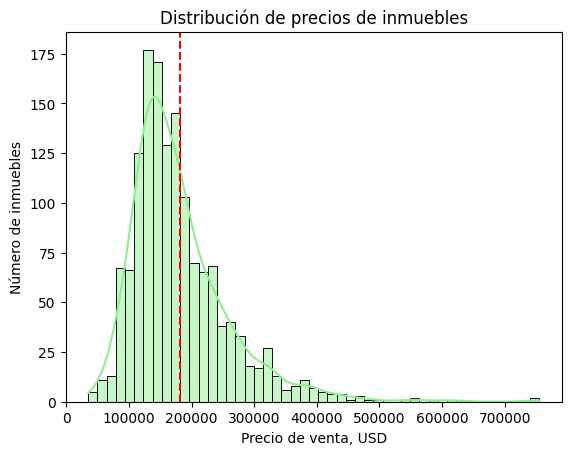

In [24]:
fig, ax = plt.subplots()
sns.histplot(x=df.SalePrice, ax= ax, kde=True, color='lightgreen')
ax.set_title('Distribución de precios de inmuebles')
ax.set_xlabel('Precio de venta, USD')
ax.set_ylabel('Número de inmuebles')

# add line with average price
ax.axvline(x=df.SalePrice.mean(), color='red', ls='--')
plt.show()

### Correlación entre las variables numéricas

In [25]:
features_correlation = df[numeric_features].corr()
features_correlation

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,SalePrice
OverallQual,1.000000,0.575126,0.597554,0.600591,0.549087,0.528483,0.100541,0.790982
GrLivArea,0.575126,1.000000,0.242666,0.489958,0.445167,0.630286,0.284519,0.708624
YearBuilt,0.597554,0.242666,1.000000,0.537663,0.408466,0.471169,0.024128,0.522897
GarageCars,0.600591,0.489958,0.537663,1.000000,0.437853,0.480012,0.180415,0.640409
TotalBsmtSF,0.549087,0.445167,0.408466,0.437853,1.000000,0.327703,0.254125,0.613581
FullBath,0.528483,0.630286,0.471169,0.480012,0.327703,1.000000,0.125826,0.560664
LotArea,0.100541,0.284519,0.024128,0.180415,0.254125,0.125826,1.000000,0.263843
SalePrice,0.790982,0.708624,0.522897,0.640409,0.613581,0.560664,0.263843,1.000000


### Representación gráfica de los coeficientes de correlación

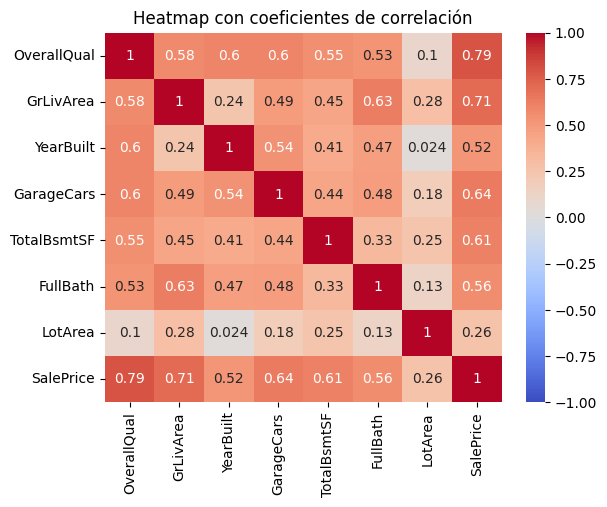

In [26]:
fig, ax = plt.subplots()
sns.heatmap(features_correlation,
            cmap='coolwarm',
            vmin=-1, vmax=+1, center=0,
            annot=True,
            ax=ax)
ax.set_title('Heatmap con coeficientes de correlación')
plt.show()

### Preprocesamiento de los datos

**X**: dataset con las variables independientes (*features*)  
**y**: dataset con la variable dependiente (*target*)

In [27]:
X = df.iloc[:, :-1]
y = df['SalePrice']

In [28]:
X.sample(3)

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
train 93              6       2291      OldTown       1910         2.0   
test  395             7       1879      SawyerW       1993         2.0   
      1014            7       2267       Sawyer       1937         2.0   

            TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  
train 93         1214.0          TA         2  C (all)     7200  
test  395        1079.0          Gd         2       RL    10560  
      1014       1005.0          TA         1       RL    12888

In [29]:
y.sample(3)

test   530         NaN
       41          NaN
train  156    109500.0
Name: SalePrice, dtype: float64

El método usado para el preprocesamiento de las variables dependerá de su naturaleza: cuantitativa o cualitativa.

In [30]:
X_numeric_features = X.select_dtypes('number').columns
X_cualitative_features = X.select_dtypes('object').columns

### Standarización de las variables numéricas  
[Video sobre estandarización de valores numéricos](https://youtu.be/bqhQ2LWBheQ?si=dJhdOvs2njo-pjUA)

In [31]:
X[X_numeric_features].describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1971.312778,1.766701,1051.777587,1.568003,10168.114080
std,1.409947,506.051045,30.291442,0.761506,440.690726,0.552969,7886.996359
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000
50%,6.000000,1444.000000,1973.000000,2.000000,990.000000,2.000000,9453.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000


Cada variable numérica tiene sus propios rango de valores, media y desviación típica. Mediante la *estandarización* de las variables, conseguimos cambiar la escala de valores, de forma que todas las variables numéricas tendrán el mismo valor de media (media = 0) y una desviación típica igual a 1.

#### Importar `StandardScaler`

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sd_scaler = StandardScaler()

In [34]:
for col in X_numeric_features:
    X[col] = sd_scaler.fit_transform( X[col].to_frame() )

In [35]:
X[X_numeric_features].sample(3)

OverallQual  GrLivArea  YearBuilt  GarageCars  TotalBsmtSF  \
train 1034    -0.772552  -1.080629  -1.099931   -1.006994    -0.299076   
test  1312    -0.772552   1.014380  -2.354625    0.306418    -0.762065   
      542      1.355551   0.711987   1.178331    1.619830     0.656406   

            FullBath   LotArea  
train 1034 -1.027363 -0.489892  
test  1312  0.781366 -0.039580  
      542   2.590094 -0.046555

In [36]:
X[X_numeric_features].describe().round(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.61,-2.31,-3.28,-2.32,-2.39,-2.84,-1.12
25%,-0.77,-0.74,-0.59,-1.01,-0.59,-1.03,-0.34
50%,-0.06,-0.11,0.06,0.31,-0.14,0.78,-0.09
75%,0.65,0.48,0.98,0.31,0.57,0.78,0.18
max,2.77,8.18,1.28,4.25,11.48,4.40,26.01


### Codficación de las variables cualitativas

Vamos a estimar los valores de los precios de los inmuebles mediante una *regresión lineal*. Concretamente, se trata de una *regresión lineal múltiple*, puesto que existe más de una variable dependiente (*features* en el argot de *Machine Learning*).

Debido a este tipo de modelo, es necesario que todas las variables independientes tengan valores numéricos. Las variables de nuestro dataset son de dos tipos: cuantitativas y cualitativas. Ya nos hemos encargado de preprocesar las cuantitativas.

Ahora es el turno de las cualitativas. Debemos transformar valores en forma de texto a valores numéricos, codificándolas. Cada valor textual de la variable cualitativa será reemplazado por un valor numérico, de forma única. Esto se consigue mediante el método de `LabelEncoder`.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
X[cualitative_features].sample(3)

Neighborhood KitchenQual MSZoning
test  892      Somerst          Gd       FV
      902       Sawyer          TA       RL
train 217      OldTown          TA       RM

In [40]:
for col in cualitative_features:
    X[col] = encoder.fit_transform(X[col])

In [41]:
X[cualitative_features].sample(3)

Neighborhood  KitchenQual  MSZoning
test 641            17            3         4
     895            20            2         3
     487             8            3         3

### División de los datos

A la hora de poner en marcha nuestro modelo de regresión, es necesario llevar a cabo dos etapas:

1. Entrenamiento del modelo.
   
   Disponemos de un conjunto de datos compuesto por valores de las variables independientes (*features*) y la variable dependiente (*target*). Entrenamos al modelo haciéndole buscar una ecuación matemática que permita calcular el valor del *target* a partir de los valores de las *features*. A la hora de encontrar esta ecuación matemática, buscamos conseguir que **los valores predichos por dicha ecuación difieran lo menos posible del valor real de la variable target**. Buscamos *minimizar el error* existente en la estimación.

2. Evaluación del modelo.

   Una vez el modelo ha sido entrenado, comprobaremos su rendimiento **prediciendo la variable dependiente (*target*) a partir de valores de las variables independientes (*features*)**. Los datos que proporcionaremos son **totalmente desconocidos hasta ahora para el modelo**. Suministraremos al modelo entrenado un dataset de *testeo*, compuesto por valores tanto de las *features* (datos de entrada a la función matemática del modelo) como sus correspondientes valores de la variable *target*. Queremos comprobar cuánta diferencia existe entre los valores predichos por el modelo y los valores reales de la variable *target*.
   El dataset original se dividió en dos partes

### División del dataset en *training* y *test* 

<center> <img src='train_test_split.jpg' width='500' /> </center>

Es necesario realizar una división primaria en el dataset: *training* y  *test*. 

Una parte del dataset (*training*) se destinará a entrenar el modelo. A su vez, el dataset *training* se vuelve a dividir:

   1. `X_train` (dataset de entrenamiento que contiene **solo las variables independientes**, las ya conocidas *features*)

   2. `y_train` (dataset de entrenamiento **exclusivamente con los valores de la variable target**).

Para evaluar la eficacia del modelo, comprobaremos cómo de exactas son las predicciones del modelo. Alimentamos al modelo con valores totalmente desconocidos para él. Estos datos totalmente nuevos para el modelo provienen de la porción *test* del dataset. A su vez, esta porción se vuelve a dividir de la siguiente forma:

1. `X_test` (dataset de evaluación que contiene **solo valores de las features**)

2. `y_test` (dataset de evaluación que contiene **los valores de la variable target que deben ser predichos por el modelo**).

Haremos uso de la clase `train_test_split` de `sci-kit learn`.

#### Particularidad de este dataset  
Los datos proporcionados para este challenge de Kaggle tienen una particularidad respecto a los dataset usados en la elaboración de un modelo de Machine Learning.  

Existe un dataset de entrenamiento (`train.csv`) y un dataset cuyos valores *target*  deben ser predichos (`test.csv`).

Esto hace que necesitemos hacer la división del dataset contenido en `train.csv` en los usuales *training* y *test*. Usaremos los datos contenidos en `test.csv` para predecir los precios de los inmuebles, cuyos resultados deberemos suministrar a Kaggle.  

Cuando al principio del *notebook* fusionamos los datasets (`train.csv` y `test.csv`) en un único dataset (`df`), añadimos una etiqueta distintiva a las filas: *train* y *test*.

El motivo de haberlos fusionado es que ambos dataset necesitaban de la limpieza y acondicionamiento de los datos, seguidos del preprocesamiento. Una vez que **todos** los datos han sido preparados, procedemos ha realizar de nuevo la distinción. Obtendremos las porciones *testing* y *test* **a partir de las filas etiquetadas como train**.

In [42]:
# valores de las features del dataset train.csv
training_data_X = X.loc['train']

In [43]:
# valores del target del dataset train.csv 
training_data_y = y.loc['train']

Procedemos a obtener las porciones *training* y *test* mediante el uso de la clase `train_test_split`.

In [44]:
from sklearn.model_selection import train_test_split 

Como hemos mencionado antes, **debido a la particularidad de los datos de este challenge, en vez de usar la palabra test, usaré la palabra eval** (evaluation) para designar la porción del dataset que se usará para evaluar el rendimiento del modelo.

In [45]:
X_train, X_eval, y_train, y_eval = train_test_split(training_data_X, training_data_y,
                                                    test_size = 0.2, random_state = 29) 

### Entrenamiento del modelo de regresión lineal

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
linear_reg = LinearRegression()

### Entrenamiento del modelo con los datos de `X_train` e `y_train`

In [48]:
linear_reg.fit(X_train, y_train)

LinearRegression()

### Predicción de los valores de target  
Para evaluar el rendimiento predictivo del modelo, usamos la porción *eval* del dataset. Hacemos uso del contenido de los datasets `X_eval`, `y_eval`.

In [49]:
y_pred = linear_reg.predict(X_eval)

### Evaluación del modelo lineal con los parámetros `mean squared error` y `R2 (R squared)`.

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

A la hora de calcular cualquier puntuación que mida el rendimiento del modelo, hay que tener en cuenta la forma en la que se introducen los datos:  
**(datos reales, datos predichos)**

In [51]:
mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

In [52]:
print(f'El modelo tiene un error cuadrático medio de: {mse:.2f} y su coeficiente de determinación es: {r2:.2f}.')

El modelo tiene un error cuadrático medio de: 2015109194.98 y su coeficiente de determinación es: 0.60.


### Generación de los resultados de la predicción para envío a Kaggle

A partir del dataset contenido en `test.csv`, realizamos predicciones de los valores del precio de los inmuebles mediante el modelo entrenado y evaluado.

Fue necesario que los datos contenidos en el dataset `test.csv` fueran limpiados y preprocesados antes de ser alimentados al modelo de regresión lineal. Es por ello que están actualmente contenidos en el `dataFrame` llamado `X`. Para obtenerlos, extraemos las filas cuya etiqueta sea `test`.

In [53]:
X_test_kaggle = X.loc['test']
X_test_kaggle.sample(3)

,OverallQual,GrLivArea,Neighborhood,YearBuilt,GarageCars,TotalBsmtSF,KitchenQual,FullBath,MSZoning,LotArea
424,1.355551,0.024192,5,0.914184,0.306418,0.931022,2,0.781366,3,0.707854
1158,0.646183,0.692223,12,-0.076364,0.306418,1.813878,3,0.781366,3,0.197687
1045,1.355551,0.296938,5,1.178331,1.619830,1.341811,2,0.781366,3,-0.125559


#### Obtención de los precios predichos por el modelo

In [54]:
predicted_sale_prices = linear_reg.predict(X_test_kaggle)

In [55]:
predicted_sale_prices

array([105559.16573287, 178672.7757561 , 163387.05381532, ...,
       152374.01491111, 109007.44050524, 228303.42667689])

### Preparación del dataset para entrega a Kaggle

Kaggle requiere para la entrega de resultados, un dataset donde se encuentren los valores de `Id` del inmueble y el correspondiente precio predicho por nuestro modelo.  

A la hora de trabajar, seleccionamos una serie de variables, desechando las demás. La variable `Id` fue una de las que fueron desechadas. Por lo tanto, para obtener los valores de `Id` de los inmuebles a predecir, es necesario recurrir al `dataFrame` llamado `test_df`. Combinaremos los datos de `Id` y las predicciones de `SalePrice` en un único y nuevo `dataFrame`.

In [56]:
id_values = test_df.Id
id_values.sample(3)

292     1753
1312    2773
919     2380
Name: Id, dtype: int64

In [57]:
kaggle_results = pd.DataFrame({'Id': id_values, 'SalePrice' : predicted_sale_prices})

In [58]:
kaggle_results.sample(5)

,Id,SalePrice
1358,2819,172624.980992
419,1880,119261.121074
988,2449,106270.073655
1009,2470,190922.969028
1224,2685,319650.854368


Reseteo los valores del índice del dataset con los resultados:

In [59]:
kaggle_results.reset_index(drop = True, inplace = True)

Finalmente, empaquetamos los resultados en un archivo csv:

In [60]:
kaggle_results.to_csv('kaggle_results.csv', index = False)

## Mejora del modelo de regresión lineal

El modelo que he entrenado tiene un bajo rendimiento (R2 = 0.6). Es necesario aplicar un modelo mejorado.  

Uno de los motivos por los que el modelo no ajusta bien los datos puede ser el denominado fenómeno de *overfitting*. Esto ocurre cuando el modelo, al usar los datos de entrenamiento, se ajusta **excesivamente** bien al dataset de entrenamiento. Esto hace que responda muy bien a los datos de `X_train`, pero a la hora de predecir datos desconocidos hasta ahora, lo haga de forma deficiente. 

<center> <img src='./img/overfitting.jpg' width='500' /> </center>

### Comprobación de la existencia de *overfitting*

Realizaré la predicción de los valores de la variable target en dos casos distintos:
1. Obtención de `y_pred_training`: predecir los valores de `SalePrice` en el dataset de entrenamiento.
2. Obtención de `y_pred_evaluation`: predecir los valores de `SalePrice` en el dataset de evaluación.

Existirá *overfitting* si: *R2 score* datos entrenamiento > *R2 score* datos evaluación. También es posible usar otros parámetros como *mean squared error*, *root mean squared error* o  *accuracy*.

In [61]:
# predicción de los precios en dataset de entrenamiento
y_pred_training = linear_reg.predict(X_train)

In [62]:
# predicción de los precios en dataset de evaluación
y_pred_evaluation = linear_reg.predict(X_eval)

In [63]:
r2_training = r2_score(y_train, y_pred_training)
r2_evaluation = r2_score(y_eval, y_pred_evaluation)

In [64]:
overfitting_test = pd.DataFrame({
    'Dataset' : ['training', 'evaluation'],
    'R2 score' : [r2_training, r2_evaluation] }).sort_values(by = 'R2 score', ascending = False)
overfitting_test

,Dataset,R2 score
0,training,0.822255
1,evaluation,0.601731


A la vista de los resultados, confirmo mis sospechas de la presencia de *overfitting* en el entrenamiento del modelo.

### Conozcamos más acerca de nuestro modelo

Estamos usando un modelo de regresión lineal. Existen dos tipos de regresión lineal:
1. Regresión lineal simple: solo existe una única variable independiente (*feature*), cuya variación genera los diferentes valores de la variable dependiente (*target*).
2. Regresión lineal múltiple: existe más de una variable independiente (*features*). Las variaciones en los valores de estas *features* hacen que obtengamos diferentes valores de la variable dependiente (*target*).

#### Ecuación matemática del modelo de regresión múltiple usado en este challenge

Es posible conocer el valor de los coeficientes que el modelo de regresión ha aplicado a cada variable independiente. Para ello obtenemos el atributo `coef_` del modelo.

In [65]:
# coeficientes del modelo
model_coeficients = linear_reg.coef_.round(2)
model_coeficients

array([ 2.360062e+04,  2.901653e+04,  3.360200e+02,  1.026526e+04,
        8.479030e+03,  1.504681e+04, -1.545763e+04, -5.142420e+03,
       -2.468000e+01,  5.542380e+03])

In [66]:
equation = ''
features = X.columns
for coef, feat in zip(model_coeficients, features):
    equation += f'{'+' if np.sign(coef) > 0 else '-'} {np.abs(coef)} * {feat} '
print(f'Ecuación de regresión lineal:\n\nSalePrice = {equation}')

Ecuación de regresión lineal:

SalePrice = + 23600.62 * OverallQual + 29016.53 * GrLivArea + 336.02 * Neighborhood + 10265.26 * YearBuilt + 8479.03 * GarageCars + 15046.81 * TotalBsmtSF - 15457.63 * KitchenQual - 5142.42 * FullBath - 24.68 * MSZoning + 5542.38 * LotArea 


### Regularización del modelo de regresión lineal

Para remediar el *overfitting* que está sufriendo el modelo, voy a regularizar los coeficientes del modelo de regresión lineal. En otras palabras, voy a hacer que el modelo **deje de ajustarse extremadamente bien a los valores de las features en el dataset de entrenamiento**. Quiero que mi modelo sea más flexible y sea capaz de predecir valores que se alejan de aquellos contenidos en los datos de entrenamiento. Esto se consigue mediante la **regularización**.

La regularización de un modelo lineal múltiple lleva a cabo una corrección de los coeficientes que acompañan a cada una de la *features* del modelo.

Existen dos métodos de regularización del modelo de regresión:
1. L1 o Lasso. Este tipo de regularización añade una penalización a la función de error al valor absoluto de cada uno de los coeficientes de la ecuación de regresión.
2. L2 o Rigde. Este tipo de regularización también añade un término de penalización a la función de error, solo que esta vez, los coeficientes están elevados al cuadrado.
3. Combinación de ambos tipos de regularización (L1 + L2)

En cada uno de los tres casos, es necesario establecer un parámetro *alfa* que indique el peso que tendrá la penalización de los coeficientes del modelo. Podemos elegir un valor cualquiera de dicho parámetro. Posteriormente aplicaremos una técnica para obtener el valor óptimo del parámetro alfa. De momento, usaremos un valor de `alfa = 0.1`.

En [este video](https://www.youtube.com/watch?v=VqKq78PVO9g) se puede encontrar más información.  

En la búsqueda de mejorar los resultados, aumentando el valor del coeficiente de determinación (*R2 score*), aplicaré los métodos de regulación L1 y L2. 

### Regularización L1 (*Lasso*)

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso_reg = Lasso(alpha=0.1)

#### Entrenamos el modelo Lasso

In [69]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

#### Realizamos la predicción de los valores de target usando la porción `eval`

In [70]:
y_pred_lasso = lasso_reg.predict(X_eval)

#### Evaluamos el modelo regularizado Lasso, haciendo uso del coeficiente de determinación (*R2 score*).

In [71]:
r2_lasso = r2_score(y_pred_lasso, y_eval) 

Repetimos el proceso, pero ahora usando un modelo regularizado de tipo L2 (*Ridge*)

### Regularización L2 (*Ridge*)

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge_reg = Ridge(alpha=0.1)

#### Entrenamos el modelo Lasso

In [74]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

#### Realizamos la predicción de los valores de target usando la porción `eval`

In [75]:
y_pred_ridge = ridge_reg.predict(X_eval)

#### Evaluamos el modelo regularizado Lasso, haciendo uso del coeficiente de determinación (*R2 score*).

In [76]:
r2_ridge = r2_score(y_pred_ridge, y_eval) 

Finalmente usamos un modelo de regresión que combina ambas regularizaciones: L1 + L2. Este tipo de modelo regularizado recibe el nombre de *ElasticNet*.

### Regularización L1 + L2 (*ElasticNet*)

In [77]:
from sklearn.linear_model import ElasticNet

In [78]:
elastic_net_reg = ElasticNet(alpha=0.1)

#### Entrenamos el modelo Lasso

In [79]:
elastic_net_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1)

#### Realizamos la predicción de los valores de target usando la porción `eval`

In [80]:
y_pred_elastic_net = elastic_net_reg.predict(X_eval)

#### Evaluamos el modelo regularizado Lasso, haciendo uso del coeficiente de determinación (*R2 score*).

In [81]:
r2_elastic_net = r2_score(y_pred_elastic_net, y_eval) 

### Comparación de los valores de coeficiente de determinación (*R2 score*)

In [82]:
print(f'Modelo Lasso (regularización L1). R2: {r2_lasso:.2f}')
print(f'Modelo Ridge (regularización L2). R2: {r2_ridge:.2f}')
print(f'Modelo ElasticNet (regularización L1 + L2). R2: {r2_elastic_net:.2f}')

Modelo Lasso (regularización L1). R2: 0.68
Modelo Ridge (regularización L2). R2: 0.68
Modelo ElasticNet (regularización L1 + L2). R2: 0.68


Vemos que el modelo ahora hace predicciones más precisas (hemos pasado de R2 = 0.6 a R2 = 0.68). Sin embargo, aún queda margen de mejora.

Por lo pronto, el siguiente paso que voy a dar será la optimización del valor del parámetro alfa. Tomé un valor de `alfa = 0.1`. Este valor lo tomé de forma arbitraria. Sin embargo, como mencioné anteriormente, existe un método para obtener un valor óptimo de este parámetro, que mejore el rendimiento de los modelos de regresión.

Este método de optimización del valor de alfa, se denomina **GridSearchCV**.

### Aplicación de la clase *GridSearchCV*

In [83]:
from sklearn.model_selection import GridSearchCV

Este método consiste en buscar un valor óptimo del parámetro alfa, que consiga minimizar los errores en las predicciones del modelo. Recordemos *alfa* es un parámetro que le indica a la función de error, cuánto pesa (aporta) la penalización de los coeficientes del modelo.  

El método `GridSearchCV` necesita algunos parámetros de entrada:
1. Modelo de regresión a optimizar.
2. Lista de posibles valores del parámetro alfa, que serán evaluados en la búsqueda del valor óptimo.
3. CV: [cross validation, minuto 2:13](https://www.youtube.com/watch?v=HdlDYng8g9s&t=325s). Indica el número de combinaciones de datos de training y testing que se formarán a la hora de evaluar el modelo.
4. Scoring: parámetro de puntuación que usaremos como valor orientativo, buscando minimizar el valor de esta puntuación.

#### Creación de la lista de posibles valores del parámetro alfa  

Mediante el uso de la función de *numpy* `logspace(exponente_inicial, exponente_final, número valores)` obtendremos una lista de valores, separados en una escala logarítmica.

Por ejemplo: `np.logspace(-4, 4, 10)` nos proporciona una lista de 10 valores, comprendidos entre 10^-4 y 10^4. Es decir, 10 valores equiespaciados, comprendidos entre 0.0001 y 10000.

La función de numpy `linspace(valor_inicial, valor_fina, número_valores)` genera una lista de n valores, equiespaciados, comprendidos entre el valor inicial y el final.

Por ejemplo: `np.linspace(0, 1, 10)` genera 10 números, equiespaciados, comprendidos entre el 0 y el 10.

En al caso del modelo *Elastic Net*, es necesario indicar valores de `l1_ratio`. Recordemos que el modelo de tipo *Elastic Net*  es una combinación de las variantes L1 (Lasso) y L2 (Ridge). `l1_ratio` indica qué porcentaje de la variante L1 se aplica a la mezcla L1 + L2 que compone el modelo *Elastic Net*.

In [84]:
param_grid_lasso = {'alpha': np.logspace(-4, 4, 10)}
param_grid_ridge = {'alpha': np.logspace(-4, 4, 10)}

En comentarios anteriores, he mencionado que el modelo de regresión *Elastic Net* es una combinación de las regularizaciones L1 y L2. Es decir, es un modelo regularizado mixto. Podemos indicar al modelo cuál será la aportación de cada regularización al modelo mixto.


A la hora de usar la clase `GridSearchCV` con un modelo de tipo *Elastic Net*, es necesario indicar una lista de valores con el porcentaje de cada regularización (L1 y L2) que compone el modelo. Los porcentajes variarán (en mi caso quiero que así sea) en un 10%. Desde un modelo con un 10% de L1 y 90% de L2, hasta un modelo donde la regularización L1 suponga el 90%. 

In [85]:
param_grid_en = {'alpha': np.logspace(-4, 4, 10),
                 'l1_ratio': np.linspace(0.1, 0.9, 10)}
# l1_ratio: np.linspace(0,1,10) da error al entrenar. 0% L1 es Ridge y da errores.

### Generamos los modelos de regresión lineal

In [86]:
lasso_reg = Lasso()
ridge_reg = Ridge()
elastic_net_reg = ElasticNet()

### Búsqueda del valor óptimo del parámetro alfa en los modelos

In [87]:
lasso_reg_cv = GridSearchCV(lasso_reg, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
ridge_reg_cv = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
elastic_net_reg_cv = GridSearchCV(elastic_net_reg, param_grid_en, cv=5, scoring='neg_mean_squared_error')

Ahora se han generado modelos de regresión que harán uso de un valor óptimo del parámetro alfa en sus correspondientes regularizaciones de los coeficientes del modelo.  

Ahora es necesario entrenar de nuevo los modelos.

### Entrenamiento de los modelos

In [88]:
lasso_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [89]:
ridge_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [90]:
elastic_net_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.1       , 0.18888889, 0.27777778, 0.36666667, 0.45555556,
       0.54444444, 0.63333333, 0.72222222, 0.81111111, 0.9       ])},
             scoring='neg_mean_squared_error')

#### Posible error en el entramiento  
En ejecuciones anteriores del entramiento de los modelos, ocurrió un error: los modelos no convergían a una solución óptima. La solución es aumentar el número de iteraciones en el entranamiento: `max_iter=10000`.  

Para solucionarlo, sería necesario volver a crear los modelos de regresión, con el nuevo parámetro `max_iter = 100_000` y volver a ejecutar la clase `GridSearchCV` para cada uno de los modelos.

In [91]:
#lasso_reg = Lasso(max_iter=1000000)
#ridge_reg = Ridge(max_iter=1000000)
#elastic_net_reg = ElasticNet(max_iter=1000000)

### Predicción de la variable *target* con los modelos regularizados

In [92]:
y_pred_lasso_cv = lasso_reg_cv.predict(X_eval)

In [93]:
y_pred_ridge_cv = ridge_reg_cv.predict(X_eval)

In [94]:
y_pred_elastic_net_cv = elastic_net_reg_cv.predict(X_eval)

### Evaluación de los modelos regularizados mediante el *R2 score*

In [95]:
r2_lasso_cv = r2_score(y_pred_lasso_cv, y_eval)

In [96]:
r2_ridge_cv = r2_score(y_pred_ridge_cv, y_eval)

In [97]:
r2_elastic_net_cv = r2_score(y_pred_elastic_net_cv, y_eval)

#### Resultados finales

Valores escogidos en la optimización del parámetro *alfa*

In [98]:
# convierto en numpy array para poder aplicar método round a los valores del array
alfa_values = np.array([lasso_reg_cv.best_params_['alpha'],
               ridge_reg_cv.best_params_['alpha'],
               elastic_net_reg_cv.best_params_['alpha']
              ])

In [99]:
models = ['Lasso', 'Ridge', 'Elastic Net' ]

A diferencia de los modelos regularizados que usé por primera vez, donde usé para todos un valor de `alfa = 0.1`, la clase `GridSearchCV` ha encontrado unos valores óptimos de dicho parámetro para cada uno de los modelos.

In [100]:
optimized_alfa_values = pd.DataFrame({ 'Model' : models, 'Value' : alfa_values.round(2)})
optimized_alfa_values

,Model,Value
0,Lasso,166.81
1,Ridge,21.54
2,Elastic Net,0.36


Voy a añadir a los valores de `r2_scores` el valor del coeficiente de determinación para el modelo de regresión **sin regularizar**.

In [101]:
r2_score_no_regular = r2_score(y_eval, linear_reg.predict(X_eval) ) 
r2_scores = np.array([r2_score_no_regular, r2_lasso_cv, r2_ridge_cv, r2_elastic_net_cv ])

Añado un modelo más a la lista: el modelo sin regularizar.

In [102]:
all_models = ['No regularized'] + models

In [103]:
r2_scores_results = pd.DataFrame({ 'Model' : all_models, 'R2 Score' : r2_scores.round(2)})
#pd.concat([r2_scores_results, overfitting_test.loc[1, :] ], axis=0 )
r2_scores_results

,Model,R2 Score
0,No regularized,0.60
1,Lasso,0.68
2,Ridge,0.68
3,Elastic Net,0.68


Se ha producido una mejora del rendimiento de los modelos, pero a pesar de haber optimizado los valores de alfa, los valores del coeficiente de determinación siguen siendo `r2_score = 0.68`.

No es una mejora significativa, pero vamos avanzando en la dirección correcta.